In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train"
validation_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation"
train_cats_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train/Cat"
train_dogs_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train/Dog"
validation_cats_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation/Cat"
validation_dogs_dir = "/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation/Dog"

In [ ]:
num_cats_tr = len(train_cats_dir)
num_dogs_tr = len(train_dogs_dir)
num_cats_val = len(validation_cats_dir)
num_dogs_val = len(validation_dogs_dir)

In [ ]:
total_train = num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

In [ ]:
print("total training cat image ", num_cats_tr)
print("total training dog image ", num_dogs_tr)
print("total validation cat image ", num_cats_val)
print("total validation dog image ", num_dogs_val)

total training cat image  65
total training dog image  65
total validation cat image  70
total validation dog image  70


In [ ]:
print("total training images ", total_train)
print("total validation images ", total_validation)

total training images  130
total validation images  140


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 

train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode="binary")

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              class_mode="binary")

Found 198 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
sample_training_images, _= next(train_data_gen)

In [ ]:
def plot_images(images_arr):
  fig, axes=plt.subplots(1, 5, figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

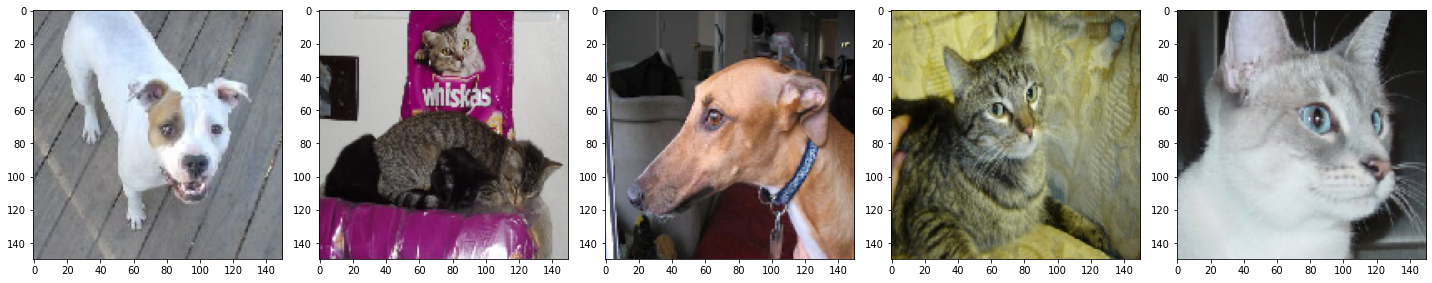

In [ ]:
plot_images(sample_training_images[:5])

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
EPOCHS = 100
history = model.fit(train_data_gen,
                    steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
                    epochs=EPOCHS,
                    validation_data=val_data_gen,
                    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))))

Epoch 1/100
2/2 [==============================] - 137s 131s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 9s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 8s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 8s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 8s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 8s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 8s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 8s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 8s 4s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] 